rate parameter: 0.1996823563384349
A: 2605.0


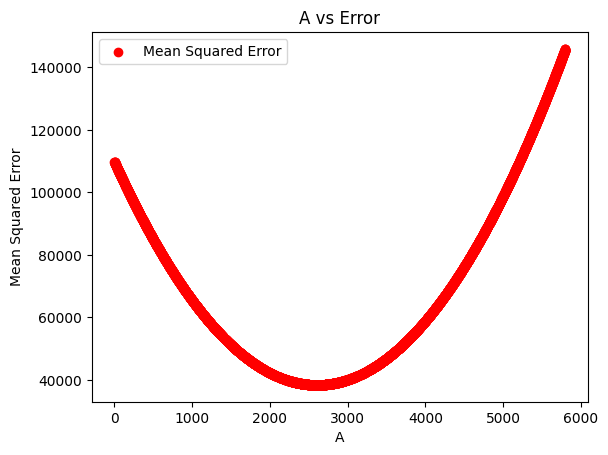

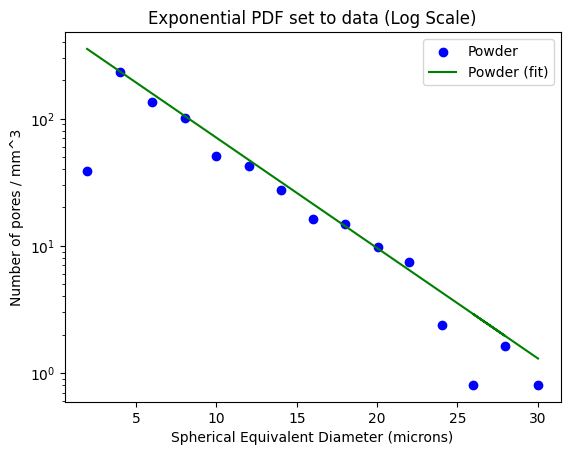

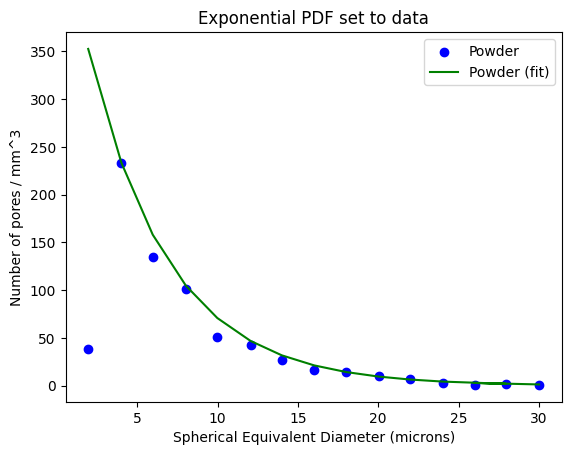

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import minmax_scale

# Imports Powder values from csv file.
csv = pd.read_csv("./p1.csv")
csv_powder_x = csv["Powder"]
csv_powder_y = csv["Unnamed: 1"]

# Starts a index 1 to remove the "X" and "Y" column headers.
X_data = csv_powder_x.iloc[1: len(csv_powder_x)]
Y_data = csv_powder_y.iloc[1: len(csv_powder_y)]

# Converts values from string to float.
X_data = pd.to_numeric(X_data)
Y_data = pd.to_numeric(Y_data)

# Converts to array.
X_data = X_data.to_numpy()
Y_data = Y_data.to_numpy()

# Scales values appropriately to their minimum and maximum. 
# X_scaled = minmax_scale(X_data, (0, 10))
# Y_scaled = minmax_scale(Y_data, (0, 1000))
X_scaled =  X_data
Y_scaled =  Y_data

# Total values for x and y should be the same.
total_values = len(X_scaled)

# Calculates the rate parameter with scaled data.
rate_parameter = total_values / np.sum(X_scaled)

print('rate parameter:', rate_parameter)

# An array of A values determined from scaled X and Y values.
A = []

# Calculate the range of possible A values with scaled data.
for i, x in enumerate(X_scaled):
    A.append((Y_scaled[i] * np.exp(rate_parameter * x))/ rate_parameter)

# Set the bounds of A value to the maximum and minumum.
A_min = np.min(A)
A_max = np.max(A)

A_range = np.arange(A_min, A_max)

# Create a list of mean squared error values to find which A value best fits.
mean_squared_error_values = []

# Calculates error for A value.
for A_value in A_range:
    squared_error = (Y_scaled - A_value*rate_parameter*np.exp(-rate_parameter*X_scaled))**2
    mean_squared_error = np.sum(squared_error) / total_values
    mean_squared_error_values.append(mean_squared_error)

# Find the minimum mean squared error value.
mean_squared_error_min = np.min(mean_squared_error_values)

# Find the associated index.
mean_squared_error_min_index = np.array(mean_squared_error_values).argmin()

# Determines that the best fit A value is the one with the lowest error.
A_fit = A_range[mean_squared_error_min_index]
print(F"A: {A_fit}")

# Calculates the appropriate Y values utilizing exponential PDF. 
Y_fit = A_fit*rate_parameter*np.exp(-rate_parameter*X_data)

# Plot the Error when finding fitting A
plt.scatter(A_range, mean_squared_error_values, c="r", label="Mean Squared Error")
plt.title("A vs Error")
plt.xlabel("A")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()

# Plot the data points along side the PDF with determined paramters (log scale).
plt.scatter(X_data, Y_data, c="b", label="Powder")
plt.plot(X_data, Y_fit, c="g", label="Powder (fit)")
plt.yscale("log")
plt.title("Exponential PDF set to data (Log Scale)")
plt.xlabel("Spherical Equivalent Diameter (microns)")
plt.ylabel("Number of pores / mm^3")
plt.legend()
plt.show()

# Plot the data points along side the PDF with determined paramters.
plt.scatter(X_data, Y_data, c="b", label="Powder")
plt.plot(X_data, Y_fit, c="g", label="Powder (fit)")
plt.title("Exponential PDF set to data")
plt.xlabel("Spherical Equivalent Diameter (microns)")
plt.ylabel("Number of pores / mm^3")
plt.legend()
plt.show()